In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft2, ifft2, fftshift, ifftshift, fftfreq
from IPython.display import Math, HTML


# Punto 1

In [2]:
# Parameters
lamb = 633e-9  # Wavelength of the laser in meters (He-Ne laser)
k = 2 * np.pi / lamb  # Wave number
z = 17.4e-2  # Propagation distance in meters
l = 0.0021  # Aperture diameter

Nf = ((l / 2) ** 2) / (lamb * z)  # Fresnel number
# print(Nf)

In [3]:
# Define the input field, for simplicity we will use a circular aperture
def U_in(x, y):
    """
    Defines the input field.

    Parameters:
    x (float): x-coordinate.
    y (float): y-coordinate.

    Returns:
    float: Value of the input field at position (x, y).
    """
    return np.where(x**2 + y**2 <= (l/2)**2, 1, 0)

# Define the Fresnel kernel
def h(x, y, z, lamb):
    """
    Defines the Fresnel kernel.

    Parameters:
    x (float): x-coordinate.
    y (float): y-coordinate.
    z (float): Propagation distance.
    lamb (float): Wavelength.

    Returns:
    complex: Value of the Fresnel kernel at position (x, y).
    """
    return (np.exp(1j * k * z) / (1j * lamb * z)) * np.exp(1j * k / (2 * z) * (x**2 + y**2))

# Define the spatial range
x = np.linspace(-0.005, 0.005, 1000)
y = np.linspace(-0.005, 0.005, 1000)

# Create a 2D grid with the spatial range
X, Y = np.meshgrid(x, y)

# Calculate the input field
U_in_2D = U_in(X, Y)

# Calculate the impulse response
h_2D = h(X, Y, z, lamb)

In [4]:
# Perform convolution using FFT
# Shift input fields to the center of the array before performing FFT
FFT_U_in_2D = ifftshift(fft2(ifftshift(U_in_2D)))
FFT_h_2D = ifftshift(fft2(ifftshift(h_2D)))

# Multiply the transformed input fields (convolution theorem)
U_out_2D = ifftshift(ifft2(ifftshift(FFT_U_in_2D * FFT_h_2D)))

# Alternatively, the convolution can be done in a single line:
# U_out_2D = np.fft.ifftshift(np.fft.ifft2(np.fft.fft2(U_in_2D) * np.fft.fft2(np.fft.ifftshift(h_2D))))

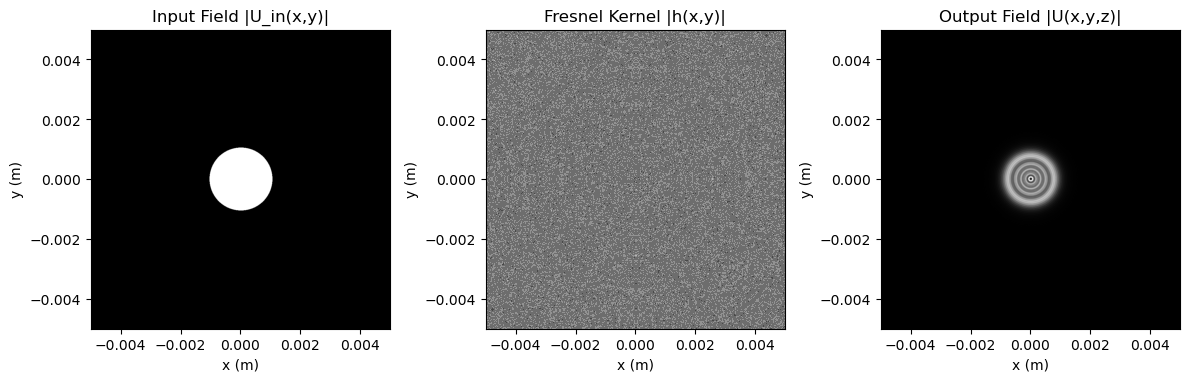

In [5]:
# Visualize the result
plt.figure(figsize=(12, 5))

# Input field
plt.subplot(1, 3, 1)
plt.imshow(np.abs(U_in_2D)**2, cmap='gray', extent=(x.min(), x.max(), y.min(), y.max()))
plt.title('Input Field |U_in(x,y)|')
plt.xlabel('x (m)')
plt.ylabel('y (m)')

# Fresnel kernel
plt.subplot(1, 3, 2)
plt.imshow(np.abs(h_2D)**2, cmap='gray', extent=(x.min(), x.max(), y.min(), y.max()))
plt.title('Fresnel Kernel |h(x,y)|')
plt.xlabel('x (m)')
plt.ylabel('y (m)')

# Output field
plt.subplot(1, 3, 3)
plt.imshow(np.abs(U_out_2D)**2, cmap='gray', extent=(x.min(), x.max(), y.min(), y.max()))
plt.title('Output Field |U(x,y,z)|')
plt.xlabel('x (m)')
plt.ylabel('y (m)')

plt.tight_layout()
plt.show()

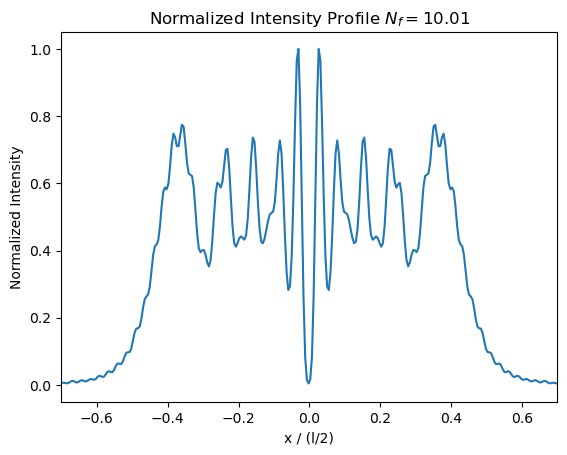

In [6]:
# print(U_out_2D.shape)

# Extract a horizontal line from the output field and normalize it
intensity = np.abs(U_out_2D)**2  # Calculate the squared magnitude of the output field
intensity = intensity[500, :]  # Extract the intensity values at y = 0 (row 500)
intensity = intensity / np.max(intensity)  # Normalize the intensity values to the maximum value

fresnel_num = (l/2)**2 / (lamb * z)

# Plot the normalized intensity profile
plt.plot((x/2) / (l/2), intensity)  # Plot the normalized intensity profile against x/(l/2)
plt.xlim(-0.7, 0.7)
plt.xlabel('x / (l/2)')  # Set the x-axis label
plt.ylabel('Normalized Intensity')  # Set the y-axis label
plt.title(rf'Normalized Intensity Profile $N_f = {fresnel_num:.2f}$')  # Set the title of the plot
plt.show()  # Display the plot



# Punto 2

In [7]:
# Define the input field, for simplicity we will use a circular aperture
def U_in(x, y):
    """
    Defines the input field.

    Parameters:
    x (float): x-coordinate.
    y (float): y-coordinate.

    Returns:
    float: Value of the input field at position (x, y).
    """
    return np.where(x**2 + y**2 <= 0.0005**2, 1, 0)

# Definition of the kernel
def H(fx, fy, z, lamb):
    """
    Defines the kernel.

    Parameters:
    fx (float): Frequency in the x-direction.
    fy (float): Frequency in the y-direction.
    z (float): Propagation distance.
    lamb (float): Wavelength.

    Returns:
    complex: Value of the kernel at frequency (fx, fy).
    """
    return np.exp(1j * k * z) * np.exp(-np.pi * lamb * 1j * z * (fx**2 + fy**2))

In [8]:
# Define distances in meters
z1 = 3E-3
z2 = 3.5E-3
z3 = 4E-3
z4 = 4.5E-3

z = z1 + z2 + z3 + z4

# Define the spatial range
x = np.linspace(-0.005, 0.005, 1600)
y = np.linspace(-0.005, 0.005, 1600)

X, Y = np.meshgrid(x, y)

# Create a 2D grid with the spatial range
fx, fy = np.meshgrid(x/(lamb*z), y/(lamb*z))

In [9]:
# First case: a sequence of distances
U_1 = H(fx, fy, z1, lamb) * H(fx, fy, z2, lamb) * H(fx, fy, z3, lamb) * H(fx, fy, z4, lamb)

# Second case: when the distances are summed
U_2 = H(fx, fy, z, lamb)

In [10]:
# Perform convolution using FFT for the first case
U_out_1 = ifftshift(fft2(ifftshift(U_in(X,Y)))) * U_1

# Perform convolution using FFT for the second case
U_out_2 = ifftshift(fft2(ifftshift(U_in(X,Y)))) * U_2

U_f1 = ifftshift(ifft2(ifftshift(U_out_1)))
U_f2 = ifftshift(ifft2(ifftshift(U_out_2)))

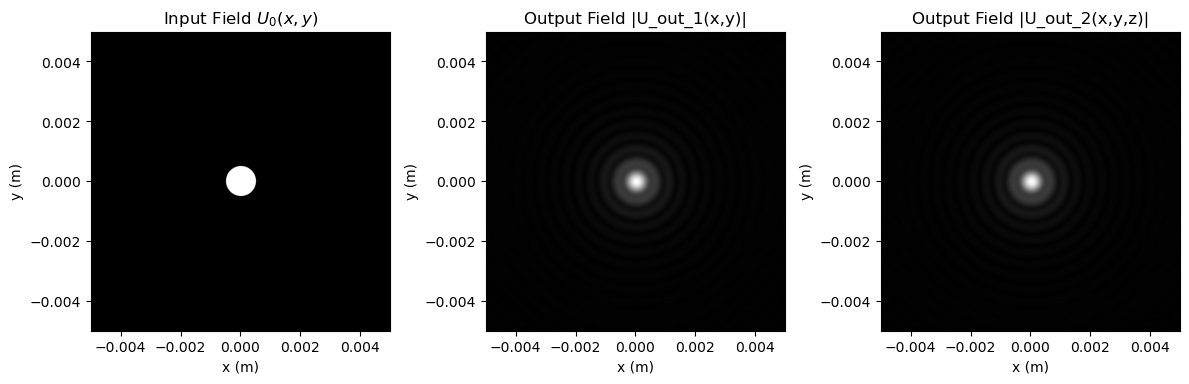

In [11]:
# Visualize the result
plt.figure(figsize=(12, 5))


plt.subplot(1, 3, 1)
plt.imshow(np.abs(U_in(X, Y))**2, cmap='gray', extent=(x.min(), x.max(), y.min(), y.max()))
plt.title(r'Input Field $U_0(x, y)$')
plt.xlabel('x (m)')
plt.ylabel('y (m)')

# Output field for the first case
plt.subplot(1, 3, 2)
plt.imshow(np.abs(U_f1), cmap='gray', extent=(x.min(), x.max(), y.min(), y.max()))
plt.title('Output Field |U_out_1(x,y)|')
plt.xlabel('x (m)')
plt.ylabel('y (m)')

# Output field for the second case
plt.subplot(1, 3, 3)
plt.imshow(np.abs(U_f2), cmap='gray', extent=(x.min(), x.max(), y.min(), y.max()))
plt.title('Output Field |U_out_2(x,y,z)|')
plt.xlabel('x (m)')
plt.ylabel('y (m)')

plt.tight_layout()
plt.show()

In [12]:
nf = (0.001/2)**2 / (lamb * z)
nf

26.32964718272775

In [13]:
mse = (np.abs(U_f2)-np.abs(U_f1)).mean()**2 # MSE to check similarity
mse

1.4008091217369978e-35

# Punto 3


In [14]:
# Create a rectangular obstacle
def dsquare_tramitance(D, H, size):
    x = np.linspace(-size/2, size/2, 2000)
    X, Y = np.meshgrid(x, x)
    U0 = ((np.abs(X) < H/2) * (np.abs(Y) < H/2 )).astype(float) - ((np.abs(X) < D/2) * (np.abs(Y) < D/2 )).astype(float)

    return U0, X, Y

In [15]:
# All units are in SI
D = 0.1E-3 #Internal lenght
H = 0.3E-3 # External lenght
size = 15E-3 # Image size
lam = 632E-9 # Wavelenght of the laser
z = 1 # Propagation distance
k = (2 * np.pi) /lam # Wavenumber

In [16]:
# We create the Ui field
cuadrado, X, Y = dsquare_tramitance(D, H, size)

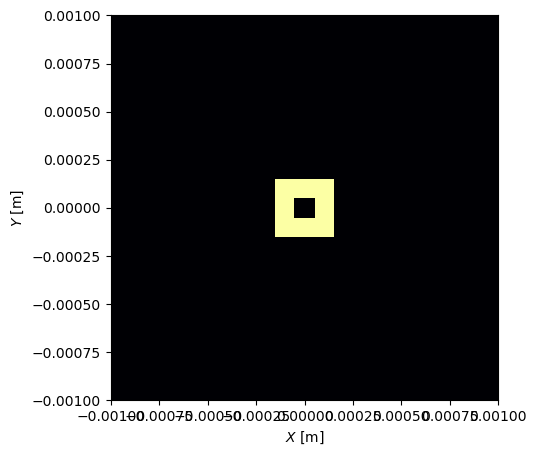

In [17]:
plt.figure(figsize=(5,5))
plt.pcolormesh(X,Y, cuadrado, cmap='inferno')
plt.xlabel('$X$ [m]')
plt.ylabel('$Y$ [m]')
plt.xlim(-1E-3,1E-3)
plt.ylim(-1E-3,1E-3)
plt.show()

In [18]:
def fraunhoffer_aprox(Ui, L, wavelenght, z):
  M, N  = np.shape(Ui) # We get the discretization for the entrance tramitance
  dx = L/M # We calculate the sample interval
  k = (2 * np.pi)/wavelenght #Calculate wavenumber
  Lo = (wavelenght * z)/ dx #Calculate view plane dimensions
  dx2 = (wavelenght * z)/ L # Calculate dx in the view plane

  # Let's generate the obstervation plane coordinates
  xo = np.linspace(-Lo/2, (Lo/2) - dx2, M)
  Xo, Yo = np.meshgrid(xo, xo)

  # Calculate the actual fresnel integral

  #Phase factor
  phase_factor = (np.exp(1j*z*k)/1j*wavelenght*z)*np.exp(((1j*k)/2*z)*(Xo**2 + Yo**2))

  # Note the scaling factor for the amplitude that goes out of the integral
  conv_integral = (1/(lam*z)**2) * ifftshift(fft2(fftshift(Ui)))*dx*dx

  # Pointwise multiplication of the phase factor and the convolution integral
  Uo = np.multiply(phase_factor, conv_integral)

  return Uo, Xo, Yo, Lo

In [19]:
# Propagate using franhouffer aproximation
Uo_sqr, Xo, Yo, _ = fraunhoffer_aprox(cuadrado, size, lam, z)

In [20]:
# Get the intensity of the field
I_square = np.abs(Uo_sqr)**2

In [21]:
# Take a look at the vector
I_square[int(I_square.shape[0]/2)]

array([1.03548134e-36, 6.29720099e-08, 2.50991854e-07, ...,
       5.61384155e-07, 2.50991854e-07, 6.29720099e-08])

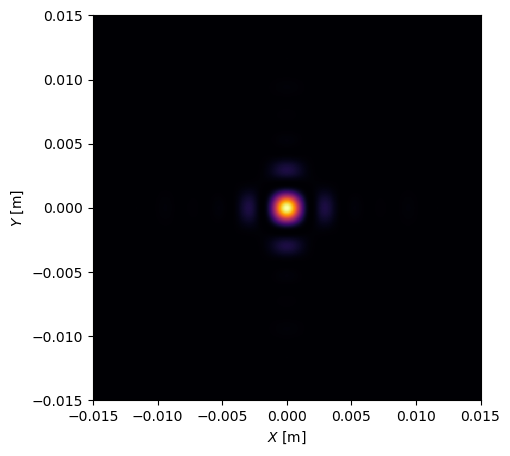

In [22]:
plt.figure(figsize=(5,5))
plt.pcolormesh(Xo,Yo, I_square, cmap='inferno')
plt.xlabel('$X$ [m]')
plt.ylabel('$Y$ [m]')
plt.xlim(-0.015,0.015)
plt.ylim(-0.015,0.015)
plt.show()

In [23]:
# Theorical intensity
def intensidad(lam,z,l0,l1,X,Y):
    fx = X/(lam*z)
    fy = Y/(lam*z)
    intensidad = (1/(lam*z)**2) * (l0**2 * np.sinc((l0*fx)) * np.sinc((l0*fy)) - l1**2 * np.sinc((l1*fx)) * np.sinc((l1*fy)) )**2
    return intensidad

In [24]:
# We calculate the theorical intensity using viewing field coordinates Xo Yo
I_teo = intensidad(lam, z, H, D, Xo, Yo)

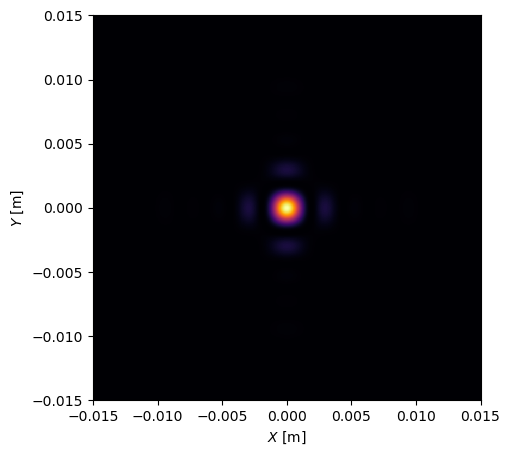

In [25]:
plt.figure(figsize=(5,5))
plt.pcolormesh(Xo,Yo, I_teo, cmap='inferno')
plt.xlabel('$X$ [m]')
plt.ylabel('$Y$ [m]')
plt.xlim(-0.015,0.015)
plt.ylim(-0.015,0.015)
plt.show()

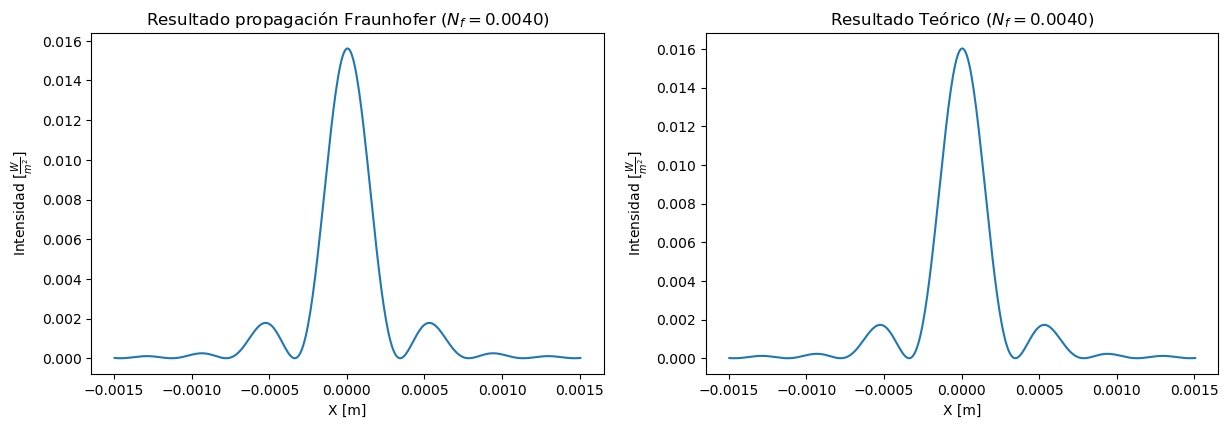

In [26]:
f, axarr = plt.subplots(1, 2, figsize=(12, 4))
f.tight_layout()

# Calculate the fresnel number to check we are in franhouffer's range
fresnel_num = (D/2)**2 / (lam * z)

axarr[0].plot(X[0][800:1201], (I_square[int(I_square.shape[0]/2)][800:1201]))
axarr[1].plot(X[0][800:1201], (I_teo[int(I_square.shape[0]/2)][800:1201]))

axarr[0].set_title(rf'Resultado propagación Fraunhofer ($N_f = {fresnel_num:.4f}$)')
axarr[1].set_title(rf'Resultado Teórico ($N_f = {fresnel_num:.4f}$)')

axarr[0].set_xlabel(r'X [m]')
axarr[1].set_xlabel(r'X [m]')

axarr[0].set_ylabel(r'Intensidad [$\frac{W}{m^2}$]')
axarr[1].set_ylabel(r'Intensidad [$\frac{W}{m^2}$]')

f.subplots_adjust(wspace=0.2, hspace=-0.4)

plt.show()

# Punto 4

In [27]:
def rect(X, l, delta):
    """
    Define a rectangular function.

    Parameters:
    x (ndarray): Array of values.
    X (float): Width of the rectangle.
    delta (float): Shift of the rectangle.

    Returns:
    ndarray: Array with values 1 where |x + delta/2| < X, and 0 otherwise.
    """
    return np.where(np.abs(X + delta/2) < l/2, 1, 0)

In [28]:
# Define the spatial range
size = 40E-3 # Image size

x = np.linspace(-size/2, size/2, 2000)

# Create a 2D grid with the spatial range
X, Y = np.meshgrid(x, x)

# Parameters for the double-slit experiment
x_l = 1e-3  # Length of each slit
y_w = 0.1e-3  # Width of each slit
delta = 0.3e-3  # Slit separation
lam = 633e-9  # Wavelength of the laser (in meters)
z = 1  # Distance from the slits to the screen (in meters)

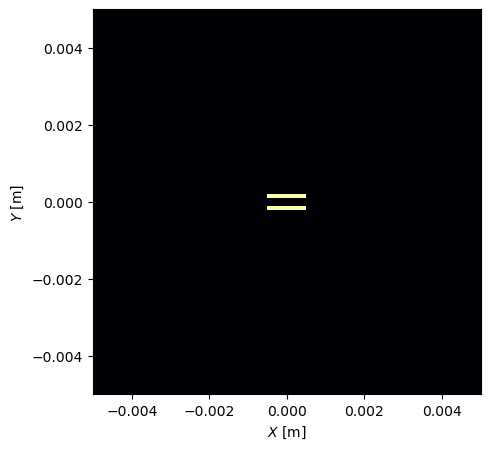

In [29]:
# Define the double slit equation
rendija = rect(X, x_l, 0) * (rect(Y, y_w, -delta) + rect(Y, y_w, delta))

# Plot the double slit pattern
plt.figure(figsize=(5,5))
plt.pcolormesh(X,Y, rendija ,cmap='inferno')
plt.xlabel('$X$ [m]')
plt.ylabel('$Y$ [m]')
plt.xlim(-0.005,0.005)
plt.ylim(-0.005,0.005)
plt.show()

In [30]:
Uo, Xo, Yo, _ = fraunhoffer_aprox(rendija, size, lam, z)

In [31]:
I_rend =  np.abs(Uo)**2

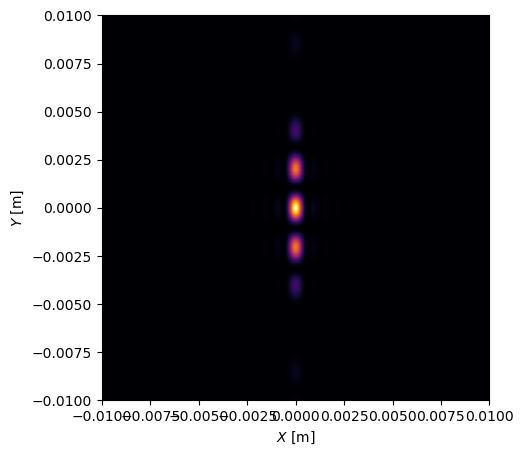

In [32]:
plt.figure(figsize=(5,5))
plt.pcolormesh(Xo,Yo, I_rend, cmap='inferno')
plt.xlabel('$X$ [m]')
plt.ylabel('$Y$ [m]')
plt.xlim(-0.01,0.01)
plt.ylim(-0.01,0.01)
plt.show()

In [33]:
def intensidad(X, Y, lam, z, delta, x, y):
    """
    Calculate the intensity for a double-slit Fraunhofer diffraction pattern.

    Parameters:
    X (float): Length of each slit.
    Y (float): Width of each slit.
    lam (float): Wavelength of the laser.
    z (float): Distance from the slits to the screen.
    delta (float): Slit separation.
    x (ndarray): Array of x-coordinates.
    y (ndarray): Array of y-coordinates.

    Returns:
    ndarray: Intensity pattern.
    """
    # Calculate sinc functions and cosine term
    sinc_x = np.sinc(X * x / (lam * z))
    sinc_y = np.sinc(Y * y / (lam * z))
    cos_term = np.cos(np.pi * delta * y / (lam * z))

    # Calculate intensity pattern
    intensity = (((2 * X * Y) / (lam * z)) ** 2) * sinc_x ** 2 * sinc_y ** 2 * cos_term ** 2

    return intensity

# Calculate intensity pattern using the defined function
I_teo = intensidad(x_l, y_w, lam, z, delta, Xo, Yo)


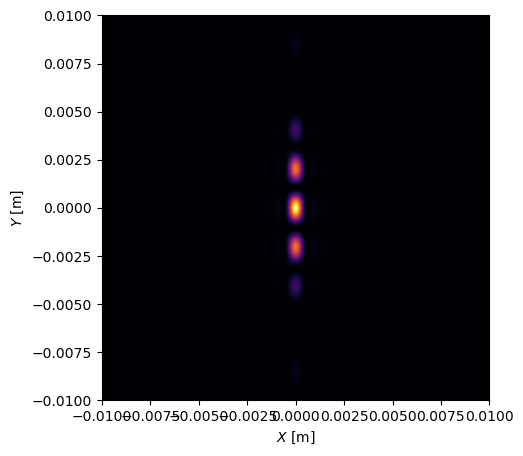

In [34]:
plt.figure(figsize=(5,5))
plt.pcolormesh(Xo,Yo, I_teo, cmap='inferno')
plt.xlabel('$X$ [m]')
plt.ylabel('$Y$ [m]')
plt.xlim(-0.01,0.01)
plt.ylim(-0.01,0.01)
plt.show()

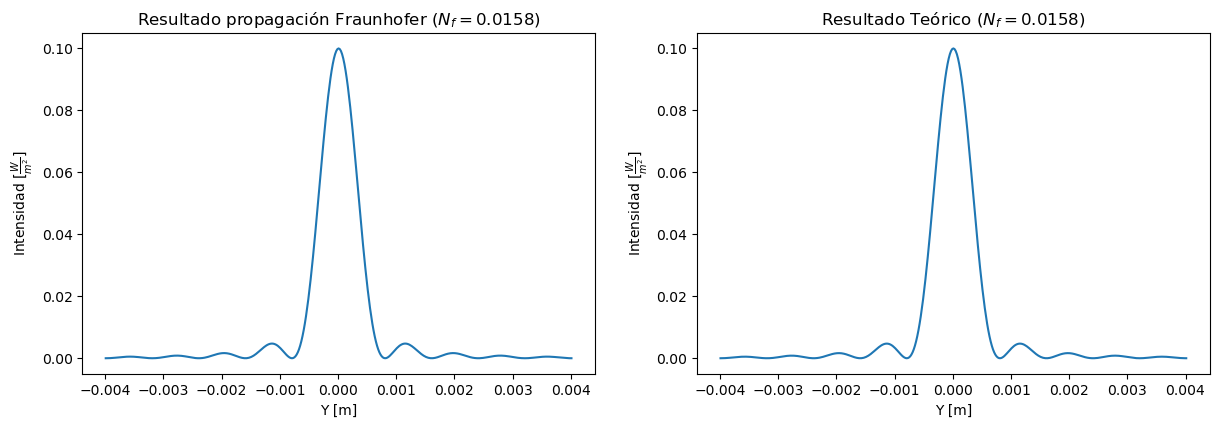

In [35]:
f, axarr = plt.subplots(1, 2, figsize=(12, 4))
f.tight_layout()

# Calculate the fresnel number to check we are in franhouffer's range
fresnel_num = (y_w)**2 / (lam * z)

axarr[0].plot(Y[:,0][800:1201], (I_rend[int(I_rend.shape[1]/2)][800:1201]))
axarr[1].plot(Y[:,0][800:1201], (I_teo[int(I_rend.shape[1]/2)][800:1201]))

axarr[0].set_title(rf'Resultado propagación Fraunhofer ($N_f = {fresnel_num:.4f}$)')
axarr[1].set_title(rf'Resultado Teórico ($N_f = {fresnel_num:.4f}$)')

axarr[0].set_xlabel(r'Y [m]')
axarr[1].set_xlabel(r'Y [m]')

axarr[0].set_ylabel(r'Intensidad [$\frac{W}{m^2}$]')
axarr[1].set_ylabel(r'Intensidad [$\frac{W}{m^2}$]')

f.subplots_adjust(wspace=0.2, hspace=-0.4)

plt.show()